In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# ! pip install matplotlib

### Exploring Products Takehome table for data quality issues

In [6]:
df_products = pd.read_csv("../data/raw/PRODUCTS_TAKEHOME.csv")
df_products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [7]:
df_products.dtypes

CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

In [8]:
df_products["CATEGORY_1"] = df_products["CATEGORY_1"].astype("string")
df_products["CATEGORY_2"] = df_products["CATEGORY_2"].astype("string")
df_products["CATEGORY_3"] = df_products["CATEGORY_3"].astype("string")
df_products["CATEGORY_4"] = df_products["CATEGORY_4"].astype("string")
df_products["MANUFACTURER"] = df_products["MANUFACTURER"].astype("string")
df_products["BRAND"] = df_products["BRAND"].astype("string")

In [9]:
df_products.dtypes

CATEGORY_1       string
CATEGORY_2       string
CATEGORY_3       string
CATEGORY_4       string
MANUFACTURER     string
BRAND            string
BARCODE         float64
dtype: object

In [10]:
df_products["CATEGORY_1"] = df_products["CATEGORY_1"].str.strip()
df_products["CATEGORY_2"] = df_products["CATEGORY_2"].str.strip()
df_products["CATEGORY_3"] = df_products["CATEGORY_3"].str.strip()
df_products["CATEGORY_4"] = df_products["CATEGORY_4"].str.strip()
df_products["MANUFACTURER"] = df_products["MANUFACTURER"].str.strip()
df_products["BRAND"] = df_products["BRAND"].str.strip()

In [11]:
df_products.fillna(value='NULL').to_csv("../data/processed/PRODUCTS_TAKEHOME.csv", index=False)

In [12]:
# checking if barcode numbers are proper
df_products.describe()

,BARCODE
count,8.415270e+05
mean,6.016109e+11
std,1.022530e+12
min,1.850000e+02
25%,7.124923e+10
50%,6.344185e+11
75%,7.683955e+11
max,6.291108e+13


In [13]:
# checking how much of data is missing / avaialble for product table, also unique values in each column and their count

print("Product dataframe")
total_product_records = df_products.shape[0]
print("Total records : ", total_product_records)

product_data ={
    "columns":[],
    "total_missing":[],
    "avialability":[],
    "n_unique_values": []
}

for col in df_products.columns:
    product_data["columns"].append(col)
    product_data["total_missing"].append(df_products[col].isna().sum())
    product_data["avialability"].append(round(((total_product_records - df_products[col].isna().sum())/total_product_records),4))
    product_data["n_unique_values"].append(df_products[col].nunique())

product_data_df = pd.DataFrame(product_data)

print("Total avialability : ", product_data_df["avialability"].mean()*100)

product_data_df

Product dataframe
Total records :  845552
Total avialability :  78.08571428571427


,columns,total_missing,avialability,n_unique_values
0,CATEGORY_1,111,0.9999,27
1,CATEGORY_2,1424,0.9983,121
2,CATEGORY_3,60566,0.9284,344
3,CATEGORY_4,778093,0.0798,127
4,MANUFACTURER,226474,0.7322,4354
5,BRAND,226472,0.7322,8122
6,BARCODE,4025,0.9952,841342


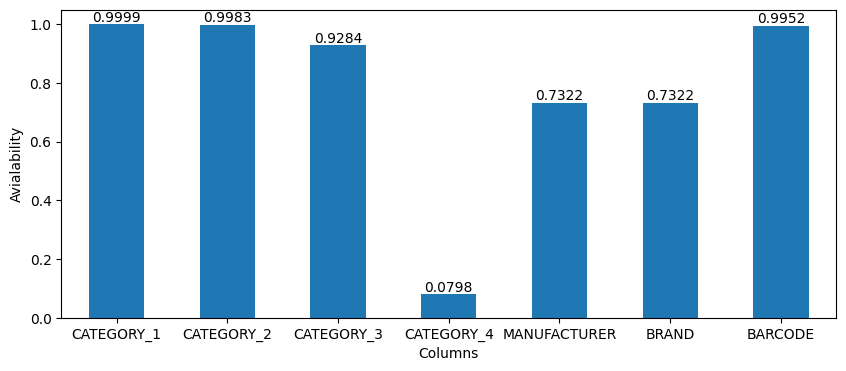

In [14]:
# plotting avaialability for better visualization

ax = product_data_df.set_index("columns")["avialability"].plot(figsize=(10,4), kind = 'bar', rot=0)
ax.set_ylabel("Avialability")
ax.set_xlabel("Columns")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [15]:
# investigating product table to understand unique entries

df_products["all_sum"] = df_products["CATEGORY_1"].astype(str)+df_products["CATEGORY_2"].astype(str)+df_products["CATEGORY_3"].astype(str)+df_products["CATEGORY_4"].astype(str)+df_products["MANUFACTURER"].astype(str)+df_products["BRAND"].astype(str)
df_products[df_products.duplicated(keep=False, subset=['all_sum'])]["all_sum"].value_counts()

SnacksCandyConfection Candy<NA><NA><NA>                                                                            17853
SnacksCandyChocolate Candy<NA><NA><NA>                                                                             14647
Health & WellnessMedicines & TreatmentsVitamins & Herbal Supplements<NA><NA><NA>                                   12949
SnacksCookies<NA><NA><NA><NA>                                                                                      10576
Health & WellnessMedical Supplies & Equipment<NA><NA><NA><NA>                                                       7267
                                                                                                                   ...  
Health & WellnessFirst AidThermometers & Accesories<NA>BROWN & HALEYBROWN & HALEY                                      2
Health & WellnessHair CareHair Loss Prevention<NA>SALLY BEAUTY HOLDINGS, INCGENERIC VALUE PRODUCTS                     2
Health & WellnessBath & BodyHand

In [16]:
df_products[df_products["all_sum"] == "SnacksCandyConfection Candy<NA><NA><NA>"]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,all_sum
55,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,6.882676e+11,SnacksCandyConfection Candy<NA><NA><NA>
84,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,7.092575e+11,SnacksCandyConfection Candy<NA><NA><NA>
105,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,7.683955e+11,SnacksCandyConfection Candy<NA><NA><NA>
108,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,6.659190e+11,SnacksCandyConfection Candy<NA><NA><NA>
165,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,7.920045e+10,SnacksCandyConfection Candy<NA><NA><NA>
...,...,...,...,...,...,...,...,...
845326,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,7.666840e+11,SnacksCandyConfection Candy<NA><NA><NA>
845414,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,8.582180e+11,SnacksCandyConfection Candy<NA><NA><NA>
845453,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,2.874405e+10,SnacksCandyConfection Candy<NA><NA><NA>
845496,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,1.574699e+10,SnacksCandyConfection Candy<NA><NA><NA>


In [17]:
print(df_products[df_products["all_sum"] == "SnacksCandyConfection Candy<NA><NA><NA>"].shape[0])
print(df_products[df_products["all_sum"] == "SnacksCandyConfection Candy<NA><NA><NA>"].isna().sum())

print()
print(df_products[df_products["all_sum"] == "SnacksCandyChocolate Candy<NA><NA><NA>"].shape[0])
print(df_products[df_products["all_sum"] == "SnacksCandyChocolate Candy<NA><NA><NA>"].isna().sum())

# by the looks of it, it looks like new barcode is assigned where other columns have null values

17853
CATEGORY_1          0
CATEGORY_2          0
CATEGORY_3          0
CATEGORY_4      17853
MANUFACTURER    17853
BRAND           17853
BARCODE             1
all_sum             0
dtype: int64

14647
CATEGORY_1          0
CATEGORY_2          0
CATEGORY_3          0
CATEGORY_4      14647
MANUFACTURER    14647
BRAND           14647
BARCODE             1
all_sum             0
dtype: int64


In [18]:
# checkign for duplicate barcodes

df_products_duplicate_barcode = df_products[df_products.duplicated(keep=False, subset=['BARCODE'])]
df_products_duplicate_barcode["BARCODE"].value_counts()

80199137.0    2
3400401.0     2
20293567.0    2
3466605.0     2
3419908.0     2
             ..
20481940.0    2
3423806.0     2
3401903.0     2
60908308.0    2
3415207.0     2
Name: BARCODE, Length: 185, dtype: int64

In [19]:
# in total there are 185 duplicate barcode

df_products_duplicate_barcode[~df_products_duplicate_barcode["BARCODE"].isna()].sort_values( by=["BARCODE"], ascending=[False])

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,all_sum
28421,Health & Wellness,Hair Care,Hair Color,<NA>,HENKEL,SCHWARZKOPF,5.233692e+10,Health & WellnessHair CareHair Color<NA>HENKEL...
709607,Health & Wellness,Hair Care,Hair Color,<NA>,HENKEL,GÖT2B,5.233692e+10,Health & WellnessHair CareHair Color<NA>HENKEL...
213340,Health & Wellness,Hair Care,Hair Color,<NA>,HENKEL,SCHWARZKOPF,1.700033e+10,Health & WellnessHair CareHair Color<NA>HENKEL...
304021,Health & Wellness,Hair Care,Hair Color,<NA>,HENKEL,GÖT2B,1.700033e+10,Health & WellnessHair CareHair Color<NA>HENKEL...
708466,Snacks,Candy,Mints,<NA>,LOTUS BRANDS INC,ECO-DENT,3.600540e+08,SnacksCandyMints<NA>LOTUS BRANDS INCECO-DENT
...,...,...,...,...,...,...,...,...
684662,Snacks,Crackers,Graham Crackers,<NA>,TRADER JOE'S,TRADER JOE'S,4.387110e+05,SnacksCrackersGraham Crackers<NA>TRADER JOE'ST...
139121,Snacks,Candy,Chocolate Candy,<NA>,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,4.043100e+05,SnacksCandyChocolate Candy<NA>PLACEHOLDER MANU...
841230,Snacks,Candy,Chocolate Candy,<NA>,MARS WRIGLEY,M&M'S,4.043100e+05,SnacksCandyChocolate Candy<NA>MARS WRIGLEYM&M'S
349945,Snacks,Candy,Confection Candy,<NA>,MARS WRIGLEY,STARBURST,4.005100e+05,SnacksCandyConfection Candy<NA>MARS WRIGLEYSTA...


In [20]:
# combining all categories
df_products["all_categories"] = df_products["CATEGORY_1"].astype(str)+df_products["CATEGORY_2"].astype(str)+df_products["CATEGORY_3"].astype(str)+df_products["CATEGORY_4"].astype(str)
df_products[df_products.duplicated(keep=False, subset=['all_categories'])]["all_categories"].value_counts()

SnacksCandyConfection Candy<NA>                                             56965
Health & WellnessMedicines & TreatmentsVitamins & Herbal Supplements<NA>    55700
SnacksCandyChocolate Candy<NA>                                              47710
SnacksCookies<NA><NA>                                                       30418
Health & WellnessHair CareHair Styling Products<NA>                         20450
                                                                            ...  
PantryCooking & BakingSpices & SeasoningsBreadcrumbs & Coatings                 2
BeveragesTeaIced Teas<NA>                                                       2
Vehicles & PartsVehicle Maintenance, Care & DecorVehicle Fluids<NA>             2
AlcoholWineSparkling WinesChampagne                                             2
AlcoholHard Seltzers, Sodas, Waters, Lemonades & TeasHard Sodas<NA>             2
Name: all_categories, Length: 418, dtype: int64

In [21]:
# trying to check how barcode is assigned
df_products[df_products["all_categories"] == "SnacksCandyConfection Candy<NA>"]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,all_sum,all_categories
55,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,6.882676e+11,SnacksCandyConfection Candy<NA><NA><NA>,SnacksCandyConfection Candy<NA>
80,Snacks,Candy,Confection Candy,<NA>,FERRARA CANDY COMPANY,NOW AND LATER,4.142052e+10,SnacksCandyConfection Candy<NA>FERRARA CANDY C...,SnacksCandyConfection Candy<NA>
81,Snacks,Candy,Confection Candy,<NA>,"WINLAND FOODS, INC",PENNSYLVANIA DUTCH,7.237617e+11,"SnacksCandyConfection Candy<NA>WINLAND FOODS, ...",SnacksCandyConfection Candy<NA>
84,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,7.092575e+11,SnacksCandyConfection Candy<NA><NA><NA>,SnacksCandyConfection Candy<NA>
101,Snacks,Candy,Confection Candy,<NA>,JELLY BELLY CANDY COMPANY,JELLY BELLY,2.071568e+12,SnacksCandyConfection Candy<NA>JELLY BELLY CAN...,SnacksCandyConfection Candy<NA>
...,...,...,...,...,...,...,...,...,...
845511,Snacks,Candy,Confection Candy,<NA>,FERRARA CANDY COMPANY,SWEETARTS,6.891392e+11,SnacksCandyConfection Candy<NA>FERRARA CANDY C...,SnacksCandyConfection Candy<NA>
845534,Snacks,Candy,Confection Candy,<NA>,<NA>,<NA>,7.053808e+10,SnacksCandyConfection Candy<NA><NA><NA>,SnacksCandyConfection Candy<NA>
845535,Snacks,Candy,Confection Candy,<NA>,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,2.000699e+12,SnacksCandyConfection Candy<NA>PLACEHOLDER MAN...,SnacksCandyConfection Candy<NA>
845537,Snacks,Candy,Confection Candy,<NA>,FERRARA CANDY COMPANY,BRACH'S,4.142001e+10,SnacksCandyConfection Candy<NA>FERRARA CANDY C...,SnacksCandyConfection Candy<NA>


### Exploring Transactions Takehome table for data quality issues

In [22]:
df_transactions = pd.read_csv("../data/raw/TRANSACTION_TAKEHOME.csv")
df_transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [23]:
df_transactions.dtypes

RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

In [24]:
df_transactions["RECEIPT_ID"] = df_transactions["RECEIPT_ID"].str.strip()
df_transactions["STORE_NAME"] = df_transactions["STORE_NAME"].str.strip()
df_transactions["USER_ID"] = df_transactions["USER_ID"].str.strip()

In [25]:

# columns Final_Quantity and FInal_Sale have str values, need to clean and convert them
df_transactions["FINAL_QUANTITY"] = df_transactions["FINAL_QUANTITY"].replace({"zero": 0.0}).astype("float")
df_transactions["FINAL_SALE"] = df_transactions["FINAL_SALE"].replace({" ": np.nan}).astype("float")

# checking if values are less than 0
print(len(df_transactions[df_transactions["FINAL_QUANTITY"] < 0.0]))

# checking if values are less than 0
print(len(df_transactions[df_transactions["FINAL_SALE"] < 0.0]))

df_transactions.describe()

0
0


,BARCODE,FINAL_QUANTITY,FINAL_SALE
count,4.423800e+04,50000.000000,37500.000000
mean,1.715863e+11,0.814427,4.576384
std,3.269219e+11,1.841794,6.625663
min,-1.000000e+00,0.000000,0.000000
25%,3.077212e+10,0.007500,1.790000
50%,5.210004e+10,1.000000,3.000000
75%,8.536765e+10,1.000000,5.190000
max,9.347108e+12,276.000000,462.820000


In [26]:
df_transactions["RECEIPT_ID"] = df_transactions["RECEIPT_ID"].astype("string")
df_transactions["STORE_NAME"] = df_transactions["STORE_NAME"].astype("string")
df_transactions["USER_ID"] = df_transactions["USER_ID"].astype("string")
df_transactions["PURCHASE_DATE"] = df_transactions["PURCHASE_DATE"].astype("datetime64[s]").dt.strftime('%Y-%m-%d %H:%M:%S').astype("string")
df_transactions["SCAN_DATE"] = df_transactions["SCAN_DATE"].astype("datetime64[s]").dt.strftime('%Y-%m-%d %H:%M:%S').astype("string")

df_transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21 00:00:00,2024-08-21 14:19:06,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20 00:00:00,2024-07-20 09:50:24,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18 00:00:00,2024-08-19 15:38:56,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18 00:00:00,2024-06-19 11:03:37,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04 00:00:00,2024-07-05 15:56:43,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,NaN


In [27]:
df_transactions.dtypes

RECEIPT_ID         string
PURCHASE_DATE      string
SCAN_DATE          string
STORE_NAME         string
USER_ID            string
BARCODE           float64
FINAL_QUANTITY    float64
FINAL_SALE        float64
dtype: object

In [28]:
df_transactions.to_csv("../data/processed/TRANSACTION_TAKEHOME.csv", index=False,  na_rep='NULL')

In [29]:
df_transactions[df_transactions["BARCODE"] <= 0]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
169,01cdaa22-a912-496b-8287-87cd9e6b3b1a,2024-07-16 00:00:00,2024-07-17 06:37:09,CARRS,6160f71f28dab1659e8b5616,-1.0,0.0,5.00
6010,3d539304-a2d1-47fd-846e-799cc8d1d15d,2024-07-12 00:00:00,2024-07-16 21:05:18,DOLLAR TREE STORES INC,6363a9e6d8987029d637d6db,-1.0,1.0,NaN
10457,6b9ee775-e895-4133-8b84-fbafbe3bd20d,2024-07-11 00:00:00,2024-07-13 13:22:38,CVS,63a4ef6bb5f32149b9d86e66,-1.0,0.0,3.00
15621,9f624eb5-bd86-44e6-aaf2-b59339b75c85,2024-07-13 00:00:00,2024-07-13 16:56:58,CVS,62893be61ec71241a98013c3,-1.0,0.0,0.46
25312,6b9ee775-e895-4133-8b84-fbafbe3bd20d,2024-07-11 00:00:00,2024-07-13 13:22:38,CVS,63a4ef6bb5f32149b9d86e66,-1.0,1.0,3.00
28894,9f624eb5-bd86-44e6-aaf2-b59339b75c85,2024-07-13 00:00:00,2024-07-13 16:56:58,CVS,62893be61ec71241a98013c3,-1.0,1.0,0.46
42636,3d539304-a2d1-47fd-846e-799cc8d1d15d,2024-07-12 00:00:00,2024-07-16 21:05:18,DOLLAR TREE STORES INC,6363a9e6d8987029d637d6db,-1.0,1.0,1.25
45823,01cdaa22-a912-496b-8287-87cd9e6b3b1a,2024-07-16 00:00:00,2024-07-17 06:37:09,CARRS,6160f71f28dab1659e8b5616,-1.0,1.0,5.00


<Axes: >

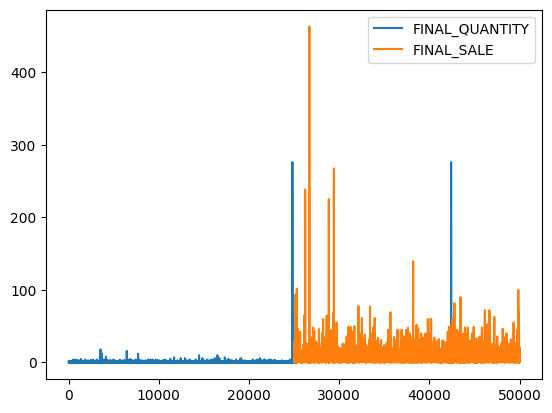

In [30]:
# plotting to check outliers
df_transactions[["FINAL_QUANTITY", "FINAL_SALE"]].plot()

In [31]:
# finding outliers wrt final quantity, taking anything above 2 std deviation as outlier

print("total outliers based on FINAL_QUANTITY :", df_transactions[df_transactions["FINAL_QUANTITY"] > 5.0].shape[0])

# finding outliers wrt final sale, taking anything above 2 std deviation as outlier

print("total outliers based on FINAL_SALE :", df_transactions[df_transactions["FINAL_SALE"] > 18.0].shape[0])

total outliers based on FINAL_QUANTITY : 64
total outliers based on FINAL_SALE : 891


In [32]:
# checking how much of data is missing / avaialble for transactions table, also unique values in each column and their count

print("Transactions dataframe")
total_transactions_records = df_transactions.shape[0]
print("Total transactions : ", total_transactions_records)

transactions_data ={
    "columns":[],
    "total_missing":[],
    "avialability":[],
    "n_unique_values": []
}

for col in df_transactions.columns:
    transactions_data["columns"].append(col)
    transactions_data["total_missing"].append(df_transactions[col].isna().sum())
    transactions_data["avialability"].append(round(((total_transactions_records - df_transactions[col].isna().sum())/total_transactions_records),4))
    transactions_data["n_unique_values"].append(df_transactions[col].nunique())

transactions_data_df = pd.DataFrame(transactions_data)

print("Total avialability : ", transactions_data_df["avialability"].mean()*100)

transactions_data_df

Transactions dataframe
Total transactions :  50000
Total avialability :  95.435


,columns,total_missing,avialability,n_unique_values
0,RECEIPT_ID,0,1.0000,24440
1,PURCHASE_DATE,0,1.0000,89
2,SCAN_DATE,0,1.0000,24374
3,STORE_NAME,0,1.0000,954
4,USER_ID,0,1.0000,17694
5,BARCODE,5762,0.8848,11027
6,FINAL_QUANTITY,0,1.0000,87
7,FINAL_SALE,12500,0.7500,1434


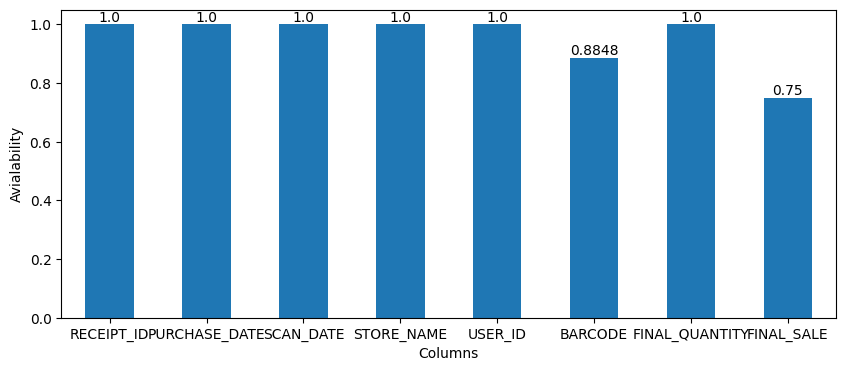

In [33]:
# plotting avaialability for better visualization

axt = transactions_data_df.set_index("columns")["avialability"].plot(figsize=(10,4), kind = 'bar', rot=0)
axt.set_ylabel("Avialability")
axt.set_xlabel("Columns")

for p in axt.patches:
    axt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [34]:
# checking for duplicate records of trasaction
df_transactions["all_sum"] = df_transactions["PURCHASE_DATE"].astype(str)+df_transactions["SCAN_DATE"].astype(str)+df_transactions["STORE_NAME"].astype(str)+df_transactions["USER_ID"].astype(str)+df_transactions["FINAL_QUANTITY"].astype(str)+df_transactions["FINAL_SALE"].astype(str)
df_transactions_duplicate_rows = df_transactions[df_transactions.duplicated(keep=False) == True]
df_transactions_duplicate_rows["all_sum"].value_counts()

# there are 149 duplicate rows in transaction table

2024-09-08 00:00:002024-09-08 20:00:42KROGER614f7e8081627974a57c8a9e1.00.89         6
2024-09-08 00:00:002024-09-08 19:39:01WALMART638e9ae602a4e512e0585b591.01.48        4
2024-09-06 00:00:002024-09-07 14:52:46HY-VEE663d07d0b7b24d45d93a9f361.01.48         4
2024-09-07 00:00:002024-09-07 17:30:53FOOD LION5ddbca50ab7b8c53a76aeee31.01.0       4
2024-09-07 00:00:002024-09-08 20:44:36SHOP RITE5ccadcdc3267801e97fa54da1.09.99      3
                                                                                   ..
2024-08-10 00:00:002024-08-19 20:50:36HY-VEE6626c422451fea1e8ceabd261.06.99         2
2024-07-26 00:00:002024-07-29 20:40:25PUBLIX60cff0e7e265b446d62200b21.04.79         2
2024-09-07 00:00:002024-09-08 14:05:53KROGER6535659da65d634c1c2a44e71.01.25         2
2024-07-21 00:00:002024-07-21 21:01:57STOP & SHOP63d8023a51bfe6be492908bc1.00.39    2
2024-07-27 00:00:002024-07-30 09:19:00ALDI5d6072320d1bff58a8686adc1.00.99           2
Name: all_sum, Length: 149, dtype: int64

In [35]:
# example of duplicate transactions
df_transactions[df_transactions["all_sum"] == "2024-09-082024-09-08 20:00:42.348 ZKROGER614f7e8081627974a57c8a9e1.00.89"]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,all_sum


In [36]:
# checking for scan and purchase date validity
df_transactions["PURCHASE_DATE"] = pd.to_datetime(df_transactions["PURCHASE_DATE"]).dt.tz_localize(None)
df_transactions["SCAN_DATE"] = pd.to_datetime(df_transactions["SCAN_DATE"]).dt.tz_localize(None)

df_transactions["Purchase_Scan_Diff"] = df_transactions["SCAN_DATE"] - df_transactions["PURCHASE_DATE"]

df_transactions["Purchase_Scan_Diff"]

0        0 days 14:19:06
1        0 days 09:50:24
2        1 days 15:38:56
3        1 days 11:03:37
4        1 days 15:56:43
              ...       
49995   10 days 14:13:08
49996    0 days 18:15:56
49997    0 days 08:03:25
49998    0 days 19:57:32
49999    0 days 15:30:07
Name: Purchase_Scan_Diff, Length: 50000, dtype: timedelta64[ns]

In [37]:
# need more understanding on how the time is captured
# found 94 rows where purchase date is after scan date
df_transactions[df_transactions["PURCHASE_DATE"] > df_transactions["SCAN_DATE"]].sort_values(by=["Purchase_Scan_Diff"], ascending=[False])

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,all_sum,Purchase_Scan_Diff
45682,d6dfa1dd-96c7-4e8c-9465-3dbc3974ec00,2024-08-21,2024-08-20 23:10:57,WALMART,6010acf151e5ec12ece67d20,4.400003e+10,1.0,4.78,2024-08-21 00:00:002024-08-20 23:10:57WALMART6...,-1 days +23:10:57
20927,d6dfa1dd-96c7-4e8c-9465-3dbc3974ec00,2024-08-21,2024-08-20 23:10:57,WALMART,6010acf151e5ec12ece67d20,4.400003e+10,0.0,4.78,2024-08-21 00:00:002024-08-20 23:10:57WALMART6...,-1 days +23:10:57
35775,6148118d-ddf5-45da-8f39-42e6702f5373,2024-06-30,2024-06-29 23:00:12,WALMART,63c8b97a39c79dcbdd5cf378,7.680852e+10,1.0,1.84,2024-06-30 00:00:002024-06-29 23:00:12WALMART6...,-1 days +23:00:12
9448,6148118d-ddf5-45da-8f39-42e6702f5373,2024-06-30,2024-06-29 23:00:12,WALMART,63c8b97a39c79dcbdd5cf378,7.680852e+10,1.0,NaN,2024-06-30 00:00:002024-06-29 23:00:12WALMART6...,-1 days +23:00:12
7271,4a471204-c9ea-4c77-a4f9-743261588f71,2024-07-25,2024-07-24 22:50:22,WALMART,5efcb5735d244611f49b09b4,7.547611e+10,0.0,3.38,2024-07-25 00:00:002024-07-24 22:50:22WALMART5...,-1 days +22:50:22
...,...,...,...,...,...,...,...,...,...,...
28820,9abbb4f5-ac03-465f-97a2-13158fdf4043,2024-06-16,2024-06-15 08:11:23,CVS,62fbe32f92710024ad021b5e,5.042833e+10,1.0,5.99,2024-06-16 00:00:002024-06-15 08:11:23CVS62fbe...,-1 days +08:11:23
23771,f37e31e8-e782-44f5-9d62-6146a7fce08f,2024-06-22,2024-06-21 07:59:33,DOLLAR GENERAL STORE,60ef8d91006ff700af8d2849,4.116701e+10,0.0,5.35,2024-06-22 00:00:002024-06-21 07:59:33DOLLAR G...,-1 days +07:59:33
39693,f37e31e8-e782-44f5-9d62-6146a7fce08f,2024-06-22,2024-06-21 07:59:33,DOLLAR GENERAL STORE,60ef8d91006ff700af8d2849,4.116701e+10,1.0,5.35,2024-06-22 00:00:002024-06-21 07:59:33DOLLAR G...,-1 days +07:59:33
33078,8c42b6ad-696c-4057-955a-039129071bae,2024-07-09,2024-07-08 05:45:31,KROGER,5f5c0cdb34682e15e13cb8bc,1.111009e+10,1.0,2.99,2024-07-09 00:00:002024-07-08 05:45:31KROGER5f...,-1 days +05:45:31


### Exploring User Takehome table for data quality issues

In [38]:
df_users = pd.read_csv("../data/raw/USER_TAKEHOME.csv")
df_users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [39]:
df_users["ID"] = df_users["ID"].str.strip()
df_users["STATE"] = df_users["STATE"].str.strip()
df_users["LANGUAGE"] = df_users["LANGUAGE"].str.strip()
df_users["GENDER"] = df_users["GENDER"].str.strip()

df_users.dtypes

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

In [40]:
df_users["ID"] = df_users["ID"].astype("string")
df_users["STATE"] = df_users["STATE"].astype("string")
df_users["LANGUAGE"] = df_users["LANGUAGE"].astype("string")
df_users["GENDER"] = df_users["GENDER"].astype("string")
df_users["CREATED_DATE"] = df_users["CREATED_DATE"].astype("datetime64[s]").dt.strftime('%Y-%m-%d %H:%M:%S').astype("string")
df_users["BIRTH_DATE"] = df_users["BIRTH_DATE"].astype("datetime64[s]").dt.strftime('%Y-%m-%d %H:%M:%S').astype("string")

df_users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54,2000-08-11 00:00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18,1994-10-28 00:00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22,<NA>,NC,en,<NA>
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50,1972-03-19 00:00:00,PA,en,female


In [41]:
df_users.dtypes

ID              string
CREATED_DATE    string
BIRTH_DATE      string
STATE           string
LANGUAGE        string
GENDER          string
dtype: object

In [42]:
df_users.fillna(value='NULL').to_csv("../data/processed/USER_TAKEHOME.csv", index=False)

In [43]:
# checking how much of data is missing / avaialble for users table, also unique values in each column and their count

print("User dataframe")
total_user_records = df_users.shape[0]
print("Total users : ", total_user_records)

user_data ={
    "columns":[],
    "total_missing":[],
    "avialability":[],
    "n_unique_values": []
}

for col in df_users.columns:
    user_data["columns"].append(col)
    user_data["total_missing"].append(df_users[col].isna().sum())
    user_data["avialability"].append(round(((total_user_records - df_users[col].isna().sum())/total_user_records),4))
    user_data["n_unique_values"].append(df_users[col].nunique())

user_data_df = pd.DataFrame(user_data)

print("Total avialability : ", user_data_df["avialability"].mean()*100)

user_data_df

User dataframe
Total users :  100000
Total avialability :  92.51833333333333


,columns,total_missing,avialability,n_unique_values
0,ID,0,1.0000,100000
1,CREATED_DATE,0,1.0000,99942
2,BIRTH_DATE,3675,0.9632,54721
3,STATE,4812,0.9519,52
4,LANGUAGE,30508,0.6949,2
5,GENDER,5892,0.9411,11


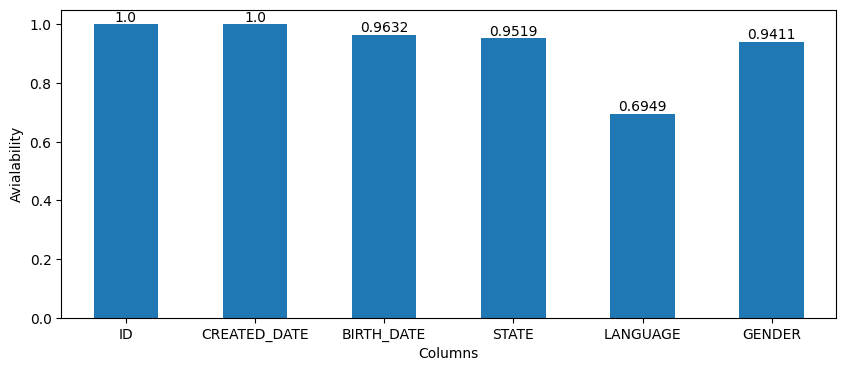

In [44]:
# plotting avaialability for better visualization

ax = user_data_df.set_index("columns")["avialability"].plot(figsize=(10,4), kind = 'bar', rot=0)
ax.set_ylabel("Avialability")
ax.set_xlabel("Columns")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [45]:
df_users["all_sum"] = df_users["CREATED_DATE"].astype(str)+df_users["BIRTH_DATE"].astype(str)+df_users["STATE"].astype(str)+df_users["LANGUAGE"].astype(str)+df_users["GENDER"].astype(str)
df_users_duplicate_rows = df_users[df_users.duplicated(keep=False) == True]
df_users_duplicate_rows["all_sum"].value_counts()

Series([], Name: all_sum, dtype: int64)

In [46]:
df_users["all_sum"].value_counts().unique()

array([1])

In [47]:
df_users[pd.to_datetime(df_users["BIRTH_DATE"]) >= pd.to_datetime(df_users["CREATED_DATE"])]

# one user created the account before being born, tech glich

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,all_sum
41974,5f31fc048fa1e914d38d6952,2020-08-11 02:01:41,2020-10-02 15:27:28,CA,<NA>,<NA>,2020-08-11 02:01:412020-10-02 15:27:28CA<NA><NA>


In [48]:
# checking if all users registered on fetch are above the 13 yesr limit set by the application

df_users["user_age"] = (pd.Timestamp.today()  - pd.to_datetime(df_users["BIRTH_DATE"]))

df_users["user_age"] = df_users["user_age"].astype('timedelta64[Y]').astype('Int64')

print("Total Users below age restriction to register on Fetch :", df_users[df_users["user_age"] < 13].sort_values(by=["user_age"], ascending=[True]).shape[0])

df_users[df_users["user_age"] < 13].sort_values(by=["user_age"], ascending=[True]).head()

Total Users below age restriction to register on Fetch : 49


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,all_sum,user_age
70457,624a8e36b04b917e273da2cd,2022-04-04 06:20:38,2022-04-03 07:00:00,<NA>,<NA>,female,2022-04-04 06:20:382022-04-03 07:00:00<NA><NA>...,2
47481,623e238655c81c62f73eb4fc,2022-03-25 20:18:14,2022-03-01 05:00:00,NY,<NA>,<NA>,2022-03-25 20:18:142022-03-01 05:00:00NY<NA><NA>,2
73587,60519c66811ba211de4ea989,2021-03-17 06:06:30,2021-03-17 05:00:00,AL,<NA>,female,2021-03-17 06:06:302021-03-17 05:00:00AL<NA>fe...,3
76542,6094549bf335a736c0e1ac40,2021-05-06 20:42:03,2021-03-06 06:00:00,<NA>,<NA>,male,2021-05-06 20:42:032021-03-06 06:00:00<NA><NA>...,3
60079,600cddd039655612b013c58d,2021-01-24 02:39:12,2021-01-23 05:00:00,NC,<NA>,transgender,2021-01-24 02:39:122021-01-23 05:00:00NC<NA>tr...,3


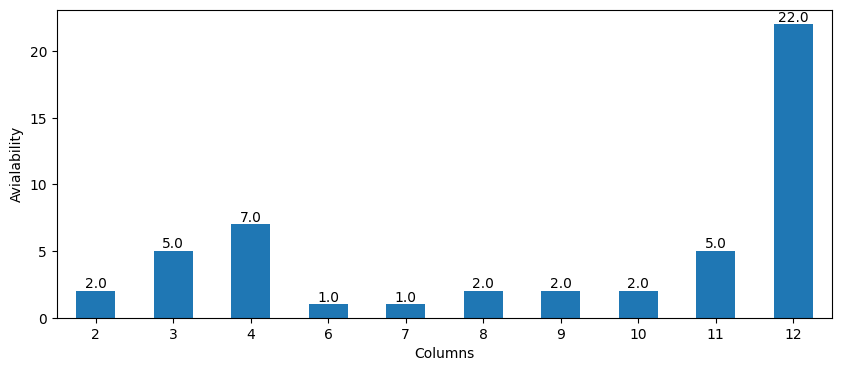

Total users below 13 years of age:  49


In [49]:
# spread of uder restricted age users

axua = df_users[df_users["user_age"] < 13].sort_values(by=["user_age"], ascending=[True])["user_age"].value_counts(sort=False).plot(figsize=(10,4), kind = 'bar', rot=0)
axua.set_ylabel("Avialability")
axua.set_xlabel("Columns")

for p in axua.patches:
    axua.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

print("Total users below 13 years of age: ",df_users[df_users["user_age"] < 13].shape[0])

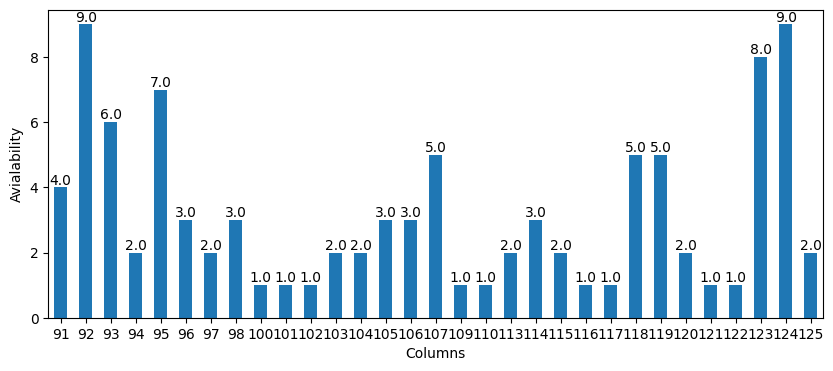

Total users above 90 years of age:  98


In [50]:
# spread of uder restricted age users

axuao = df_users[df_users["user_age"] > 90].sort_values(by=["user_age"], ascending=[True])["user_age"].value_counts(sort=False).plot(figsize=(10,4), kind = 'bar', rot=0)
axuao.set_ylabel("Avialability")
axuao.set_xlabel("Columns")

for p in axuao.patches:
    axuao.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

print("Total users above 90 years of age: ", df_users[df_users["user_age"] > 90].shape[0])

In [51]:
df_users["STATE"].unique()

# PR = Puerto Rico

<StringArray>
['CA', 'PA', 'FL', 'NC', 'NY', 'IN', <NA>, 'OH', 'TX', 'NM', 'PR', 'CO', 'AZ',
 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI', 'IA', 'GA', 'VA', 'DC', 'KY',
 'SC', 'MN', 'WV', 'DE', 'MI', 'IL', 'MS', 'WA', 'KS', 'CT', 'OR', 'UT', 'MD',
 'OK', 'NE', 'NV', 'AL', 'AK', 'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD',
 'VT']
Length: 53, dtype: string

In [52]:
df_users["LANGUAGE"].unique()

<StringArray>
['es-419', 'en', <NA>]
Length: 3, dtype: string

In [53]:
df_users["GENDER"].unique()

<StringArray>
[                'female',                     <NA>,                   'male',
             'non_binary',            'transgender',      'prefer_not_to_say',
             'not_listed',             'Non-Binary',                'unknown',
          'not_specified', "My gender isn't listed",      'Prefer not to say']
Length: 12, dtype: string

In [54]:
df_users.sort_values(by=["BIRTH_DATE"], ascending=[True])

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,all_sum,user_age
57986,57ac7acde4b0d25aa48097bc,2016-08-11 13:17:01,1900-01-01 00:00:00,<NA>,<NA>,<NA>,2016-08-11 13:17:011900-01-01 00:00:00<NA><NA>...,125
81087,54e7918de4b0b56c0b136f3a,2015-02-20 19:57:01,1900-01-01 00:00:00,<NA>,<NA>,<NA>,2015-02-20 19:57:011900-01-01 00:00:00<NA><NA>...,125
19638,5b343b1a8c5ff7623be2af93,2018-06-28 01:34:18,1900-11-01 08:00:00,CA,en,female,2018-06-28 01:34:181900-11-01 08:00:00CAenfemale,124
59306,6108a98aa1ffea0b098ba933,2021-08-03 02:27:22,1900-12-08 00:00:00,NY,<NA>,male,2021-08-03 02:27:221900-12-08 00:00:00NY<NA>male,124
98639,61a1127207acef7276e6158f,2021-11-26 16:59:30,1901-01-01 05:00:00,PA,en,male,2021-11-26 16:59:301901-01-01 05:00:00PAenmale,124
...,...,...,...,...,...,...,...,...
99959,651cc4b055f575777d10c55e,2023-10-04 01:49:36,<NA>,FL,es-419,<NA>,2023-10-04 01:49:36<NA>FLes-419<NA>,<NA>
99966,65fc1b855a33935f1ed8a602,2024-03-21 11:35:33,<NA>,<NA>,en,<NA>,2024-03-21 11:35:33<NA><NA>en<NA>,<NA>
99969,65fce2a57756e548cb85ed9f,2024-03-22 01:45:09,<NA>,<NA>,es-419,<NA>,2024-03-22 01:45:09<NA><NA>es-419<NA>,<NA>
99972,654cd6b5a225ea102b810475,2023-11-09 12:55:17,<NA>,<NA>,es-419,<NA>,2023-11-09 12:55:17<NA><NA>es-419<NA>,<NA>


In [55]:
print(df_users["ID"].nunique())
print(df_transactions[~df_transactions["USER_ID"].isin(df_users["ID"])]["USER_ID"].nunique())
df_transactions[df_transactions["USER_ID"].isin(df_users["ID"])]["USER_ID"].nunique()

100000
17603


91

In [56]:
print(df_products["BARCODE"].nunique())
print(df_transactions[~df_transactions["BARCODE"].isin(df_products["BARCODE"])]["BARCODE"].nunique())
df_transactions[df_transactions["BARCODE"].isin(df_products["BARCODE"])]["BARCODE"].nunique()

841342
4465


6562

### Fields difficult to understand / need more explaination

##### For Product Table

-   More information on Barcode, how is it generated, is it unique for each product ? there seem to be multi-barcode scenarios for the same product
-   Are Categories hierarchical or independent, they seem hierarchical but some have lot of missing data
-   In depth understanding of each column in table and the reason/ business implications behind why only these were extracted will help in better understanding how to best model data for valuable insights

##### For Transaction Table

-   How are user_id, recipt_id and barcode corelated, as per my understanding one user can have multiple recipt_id and one recipt_id can have multiple barcode, also barcode is not unique to each recipt_id
-   Why does scan date have time on it and purchase date doesnt, also some purchase date after scan date, how is it possible
-   Store name seems to be same even if it is a chain store, why are location not being tracked ?
-   Unclear on units being represented in Final sale and Final Quantity, is Final sale dollar amount inluding tax and discounts ? for quantity, are they per unit or packages ?
-   In depth understanding of each column in table and the reason/ business implications behind why only these were extracted will help in better understanding how to best model data for valuable insights

##### For User Table

-   Create_date vs birth_date, it seems one corresponds to when account was created and another when the user was born, need clarification on this as the data shows there are users less than 13 years of age
-   How are Languages collected, there seemed to only two options, are they fixed?
-   What all options are present for state and Gender column ?

##### Overall
-   Need more insights on how the columns are defined as in what sort of values are expected for each column and why are they collected as such with respect to business objective